# Project: Investigate a No-show Appointments Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
We have to analyze the no-show dataset that collects information from more than 100k medical appointments in Brazil and we have to focus on the question of whether patients will show up for their appointments or not, and that will be done by asking some questions and looking for its answers from the dataset.
### Dataset Description 
The dataset consists of 110,527 rows and 14 columns, some of this columns are important to us and others is not.(I will handle it).
There are some informations about some columns:
.‘ScheduledDay’ tells us on what day the patient set up their appointment.
.‘Neighborhood’ indicates the location of the hospital.
.‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
.‘No-show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. (I will handle it).

### Questions for Analysis:
### Question 1: Does gender affect showing up?
### Question 2: Does Age affects showing up?
### Question 3: Does receiving SMS affects showing up?
### Question 4: Does neighbourhood affects showing up?
### Question 5: Does scholarship affects showing up?

In [33]:
#import statements for all of the packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to plot figures
import seaborn as sns #not necessary but makes visualization look nice
# The 'magic word' so that my visualizations are plotted
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

In [34]:
# Load my data and print out a few lines and Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [35]:
#explore the dataset shape (number of rows and columns).
df.shape

(110527, 14)

so the dataset consists of 110527 rows and 14 column all of these a valued.

In [36]:
#get some statistics informations for columns.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The maximum age is 115 years.
The average is about 37 years.
50% of patients is between 18 years and 55 years.
there is a msitake in minimum age will be handle if needed.

In [37]:
#explore columns name and check for NaN values and explore data types. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has a 110527 rows and has no NaN values.

In [38]:
#now lets check the duplications and use .sum() method to get the sum of duplication if exist
df.duplicated().sum()

0

There is no duplication in this dataset.


### Data Cleaning
In this section we will clean up the dataset by deleting unnecessary columns and deleting rows with wrong data and correct the column name if needed.

In [39]:
#removing unneceeary column (Columns that are not included in the analysis process).
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [40]:
#correct the columns names ('Hipertention' spelling and 'No-show' with undescore).
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

Frist lets take a general look on columns values

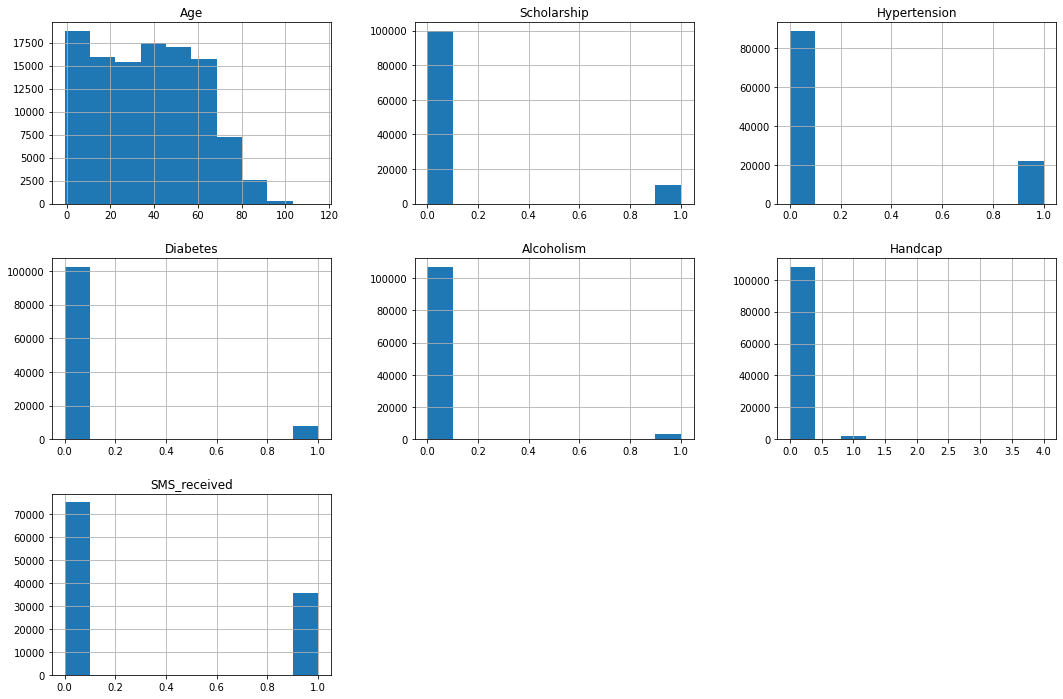

In [41]:
#make a histogram for all columns.
df.hist(figsize=(18,12));

As we can see from figures:
The age column has a wide range variation, Most of paitients not enrolled to scholarship program, Most of patients didn't suffer from handicapped, About 20000 patients suffered from hypertension and Most of patients are non-alcoholic.

In [42]:
#We can make 2 groups(pandas series) for easy calling and cmparison.
NoShow = df.No_show =='Yes'
Show = df.No_show == 'No'

This means that about 80% of patients are shows and about 20% are no shows.

Investigate the affective factors on the show/no show rate.

In [43]:
# to avoid repetitive code we can make a plot function as follow
def Plote(Data1,Data2,labels,Title,Xlabel,Ylabel):
    plt.figure(figsize=[10,7]) #setting the figure size.
    Data1.hist(alpha=0.5,bins = 7,color ='red' ,label = labels[0])
    Data2.hist(alpha = 0.5,bins = 7 ,color='green',label = labels[1])
    plt.legend();
    plt.title(Title)#to set the figure title
    plt.xlabel(Xlabel)#to set the X-axis label
    plt.ylabel(Ylabel)#to set the Y-axis label

### Research Question 1  (Does gender affect showing up?)

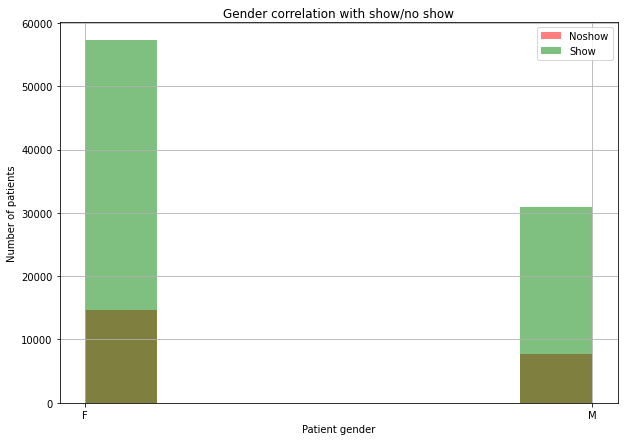

In [44]:
Plote(df.Gender[NoShow],df.Gender[Show],['Noshow','Show'],'Gender correlation with show/no show','Patient gender','Number of patients')

From figures we can see that there is no correlation between the patient gender and showing up or not (about 25% of patients are show in both males and females).

### Research Question 2  (Does Age affects showing up?)

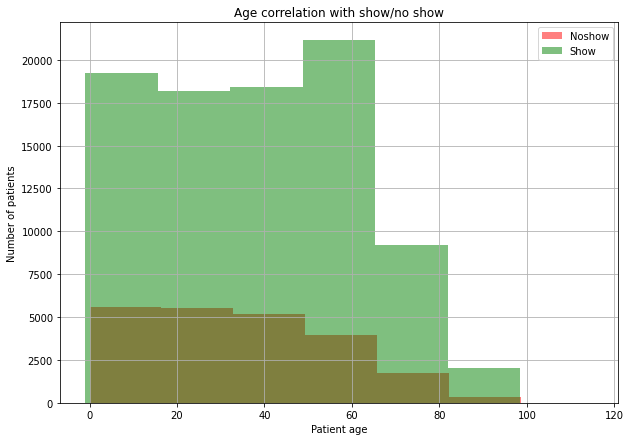

In [45]:
Plote(df.Age[NoShow],df.Age[Show],['Noshow','Show'],'Age correlation with show/no show','Patient age','Number of patients')

As we can see the showing up rate is high at young ages and nearly constant percentage of no show with respect to show (about 20~25% of patients at the same age ).

### Research Question 3  (Does receiving SMS affects showing up?)

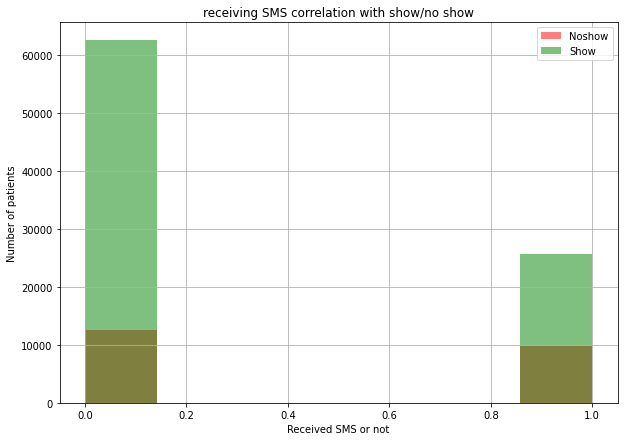

In [46]:
Plote(df.SMS_received[NoShow],df.SMS_received[Show],['Noshow','Show'],'receiving SMS correlation with show/no show','Received SMS or not','Number of patients')

Unexpectedly, receiving SMS did not affect showing up, and showing up was higher in patients who did not received SMS!!!

### Research Question 4  (Does neighbourhood affects showing up?)

Text(0, 0.5, 'Number of patients')

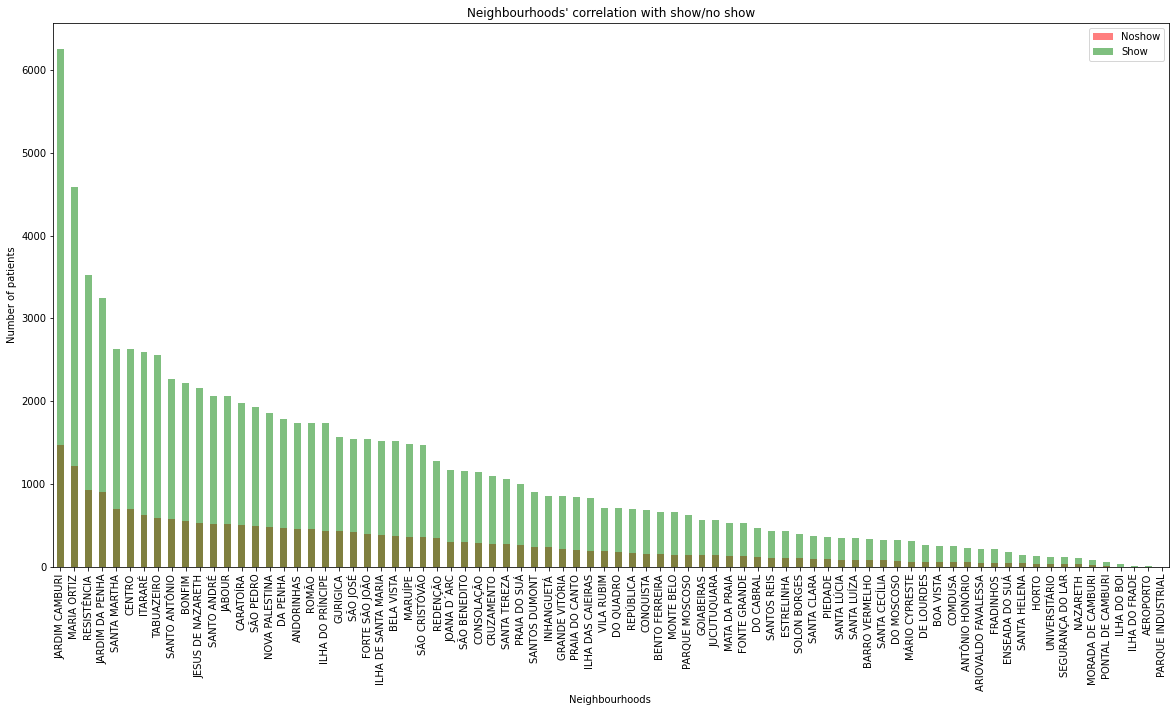

In [47]:
plt.figure(figsize=[20,10]) #setting the figure size.
df.Neighbourhood[NoShow].value_counts().plot(alpha=0.5,color='red',kind='bar',label = 'Noshow')
df.Neighbourhood[Show].value_counts().plot(alpha = 0.5,color='green',kind='bar',label = 'Show')
plt.legend();
plt.title("Neighbourhoods' correlation with show/no show")
plt.xlabel('Neighbourhoods ')
plt.ylabel('Number of patients')

As we can see there is strog correlation between the neighbourhoods and showing up or not.

### Research Question 5  (Does scholarship affects showing up?)

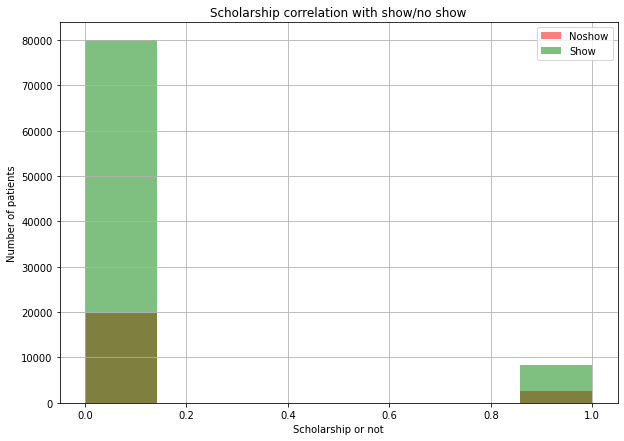

In [48]:
Plote(df.Scholarship[NoShow],df.Scholarship[Show],['Noshow','Show'],'Scholarship correlation with show/no show','Scholarship or not','Number of patients')

As we can see patients who has no scholaship is more than who hasn't and showing up percentage is may be the same (about 25% show up in both sides).

In [49]:
#grouping and count show or no show patients according to scholarship
df.groupby('Scholarship').No_show.value_counts()

Scholarship  No_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

As we can see most of patients (72% of total patients) have no scholaship However they comes.

<a id='conclusions'></a>

## Conclusions

Finally, I did not find a clear correlation between gender,scholarship and showing up or not.
Unexpectedly, receiving SMS did not affect showing up, and showing up was higher in patients who did not received SMS!. so the SMS system should be checked.
The showing up rate is high at young ages and nearly constant percentage of no show/show (about 20~25% of patients at the same age ).
Neighbourhoods is the only variable I found with a strog correlation with showing up.

## Limitations
I can't find astrong correlation between showing up or not and most of variable I tested, Like: gender, scholarship and age.
I see that there is an important column can added to check the patient review. 

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1